##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [1]:
#%pip install pandas 
#%pip install matplotlib
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

%pip install pandas 
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install sklearn
%pip install tqdm
%pip install xgboost
%pip install numpy
%pip install scipy

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve
from tqdm import tqdm

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .parquet file inside that. A relative path *must* be used when loading data into pandas

In [2]:
# Can have as many cells as you want for code
import pandas as pd
filepath = "./data/catB_train.parquet" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

In [5]:
df = pd.read_parquet(filepath)
df.head()

,clntnum,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,flg_has_life_claim,flg_gi_claim,flg_is_proposal,flg_with_preauthorisation,flg_is_returned_mail,is_consent_to_mail,is_consent_to_email,is_consent_to_call,is_consent_to_sms,is_valid_dm,is_valid_email,is_housewife_retiree,is_sg_pr,is_class_1_2,is_dependent_in_at_least_1_policy,f_ever_declined_la,hh_20,pop_20,hh_size,hh_size_est,annual_income_est,n_months_last_bought_products,flg_latest_being_lapse,flg_latest_being_cancel,recency_lapse,recency_cancel,tot_inforce_pols,tot_cancel_pols,ape_gi_42e115,ape_ltc_1280bf,ape_grp_6fc3e6,ape_grp_de05ae,ape_inv_dcd836,ape_grp_945b5a,ape_grp_6a5788,ape_ltc_43b9d5,ape_grp_9cdedf,ape_lh_d0adeb,ape_grp_1581d7,ape_grp_22decf,ape_lh_507c37,ape_lh_839f8a,ape_inv_e9f316,ape_gi_a10d1b,ape_gi_29d435,ape_grp_caa6ff,ape_grp_fd3bfb,ape_lh_e22a6a,ape_grp_70e1dd,ape_grp_e04c3a,ape_grp_fe5fb8,ape_gi_856320,ape_grp_94baec,ape_gi_058815,ape_grp_e91421,ape_lh_f852af,ape_lh_947b15,ape_32c74c,sumins_gi_42e115,sumins_ltc_1280bf,sumins_grp_6fc3e6,sumins_grp_de05ae,sumins_inv_dcd836,sumins_grp_945b5a,sumins_grp_6a5788,sumins_ltc_43b9d5,sumins_grp_9cdedf,sumins_lh_d0adeb,sumins_grp_1581d7,sumins_grp_22decf,sumins_lh_507c37,sumins_inv_e9f316,sumins_gi_a10d1b,sumins_gi_29d435,sumins_grp_caa6ff,sumins_grp_fd3bfb,sumins_lh_e22a6a,sumins_grp_70e1dd,sumins_grp_e04c3a,sumins_grp_fe5fb8,sumins_gi_856320,sumins_grp_94baec,sumins_gi_058815,sumins_grp_e91421,sumins_lh_f852af,sumins_lh_947b15,sumins_32c74c,prempaid_gi_42e115,prempaid_ltc_1280bf,prempaid_grp_6fc3e6,prempaid_grp_de05ae,prempaid_inv_dcd836,prempaid_grp_945b5a,prempaid_grp_6a5788,prempaid_ltc_43b9d5,prempaid_grp_9cdedf,prempaid_lh_d0adeb,prempaid_grp_1581d7,prempaid_grp_22decf,prempaid_lh_507c37,prempaid_lh_839f8a,prempaid_inv_e9f316,prempaid_gi_a10d1b,prempaid_gi_29d435,prempaid_grp_caa6ff,prempaid_grp_fd3bfb,prempaid_lh_e22a6a,prempaid_grp_70e1dd,prempaid_grp_e04c3a,prempaid_grp_fe5fb8,prempaid_gi_856320,prempaid_grp_94baec,prempaid_gi_058815,prempaid_grp_e91421,prempaid_lh_f852af,prempaid_lh_947b15,prempaid_32c74c,ape_839f8a,ape_e22a6a,ape_d0adeb,ape_c4bda5,ape_ltc,ape_507c37,ape_gi,f_hold_839f8a,f_hold_e22a6a,f_hold_d0adeb,f_hold_c4bda5,f_hold_ltc,f_hold_507c37,f_hold_gi,sumins_839f8a,sumins_e22a6a,sumins_d0adeb,sumins_c4bda5,sumins_ltc,sumins_507c37,sumins_gi,prempaid_839f8a,prempaid_e22a6a,prempaid_d0adeb,prempaid_c4bda5,prempaid_ltc,prempaid_507c37,prempaid_gi,lapse_ape_ltc_1280bf,lapse_ape_grp_6fc3e6,lapse_ape_grp_de05ae,lapse_ape_inv_dcd836,lapse_ape_grp_945b5a,lapse_ape_grp_6a5788,lapse_ape_ltc_43b9d5,lapse_ape_grp_9cdedf,lapse_ape_lh_d0adeb,lapse_ape_grp_1581d7,lapse_ape_grp_22decf,lapse_ape_lh_507c37,lapse_ape_lh_839f8a,lapse_ape_inv_e9f316,lapse_ape_grp_caa6ff,lapse_ape_grp_fd3bfb,lapse_ape_lh_e22a6a,lapse_ape_grp_70e1dd,lapse_ape_grp_e04c3a,lapse_ape_grp_fe5fb8,lapse_ape_grp_94baec,lapse_ape_grp_e91421,lapse_ape_lh_f852af,lapse_ape_lh_947b15,lapse_ape_32c74c,n_months_since_lapse_ltc_1280bf,n_months_since_lapse_grp_6fc3e6,n_months_since_lapse_grp_de05ae,n_months_since_lapse_inv_dcd836,n_months_since_lapse_grp_945b5a,n_months_since_lapse_grp_6a5788,n_months_since_lapse_ltc_43b9d5,n_months_since_lapse_grp_9cdedf,n_months_since_lapse_lh_d0adeb,n_months_since_lapse_grp_1581d7,n_months_since_lapse_grp_22decf,n_months_since_lapse_lh_507c37,n_months_since_lapse_lh_839f8a,n_months_since_lapse_inv_e9f316,n_months_since_lapse_grp_caa6ff,n_months_since_lapse_grp_fd3bfb,n_months_since_lapse_lh_e22a6a,n_months_since_lapse_grp_70e1dd,n_months_since_lapse_grp_e04c3a,n_months_since_lapse_grp_fe5fb8,n_months_since_lapse_grp_94baec,n_months_since_lapse_grp_e91421,n_months_since_lapse_lh_f852af,n_months_since_lapse_lh_947b15,n_months_since_lapse_32c74c,f_ever_bought_839f8a,f_ever_bought_e22a6a,f_ever_bought_d0adeb,f_ever_bought_c4bda5,f_ever_bought_ltc,f_ever_bought_507c37,f_ever_bought_

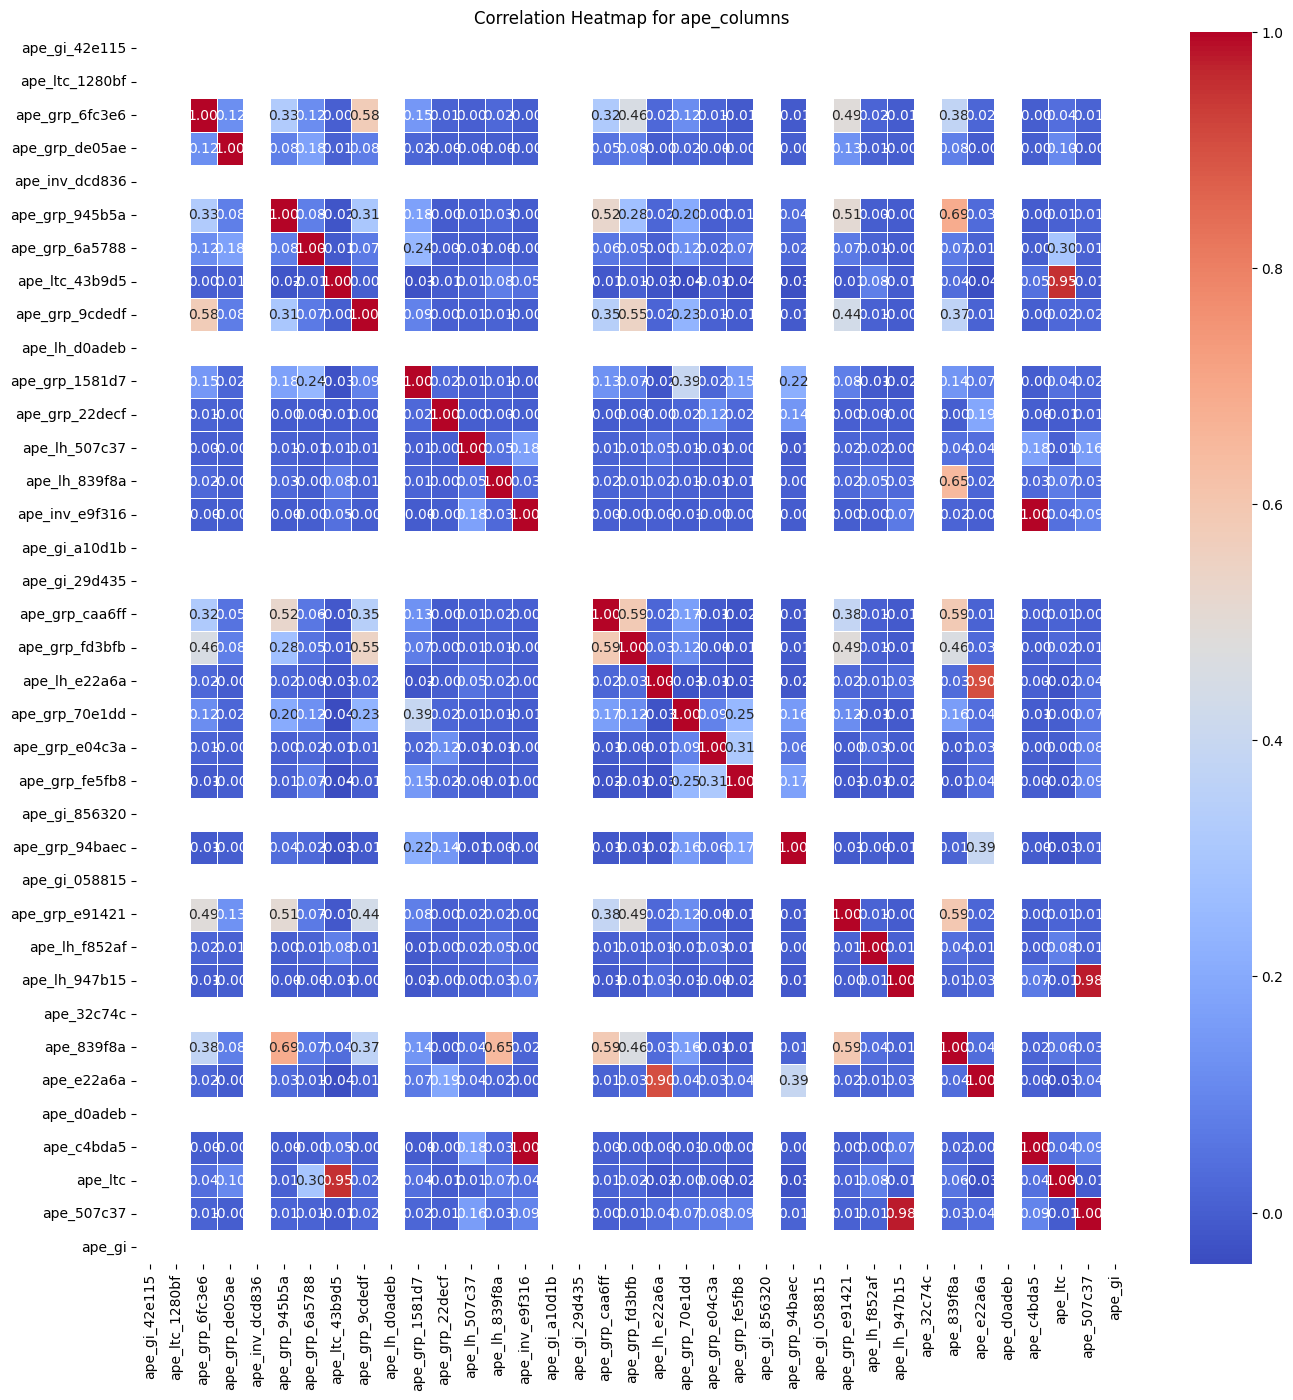

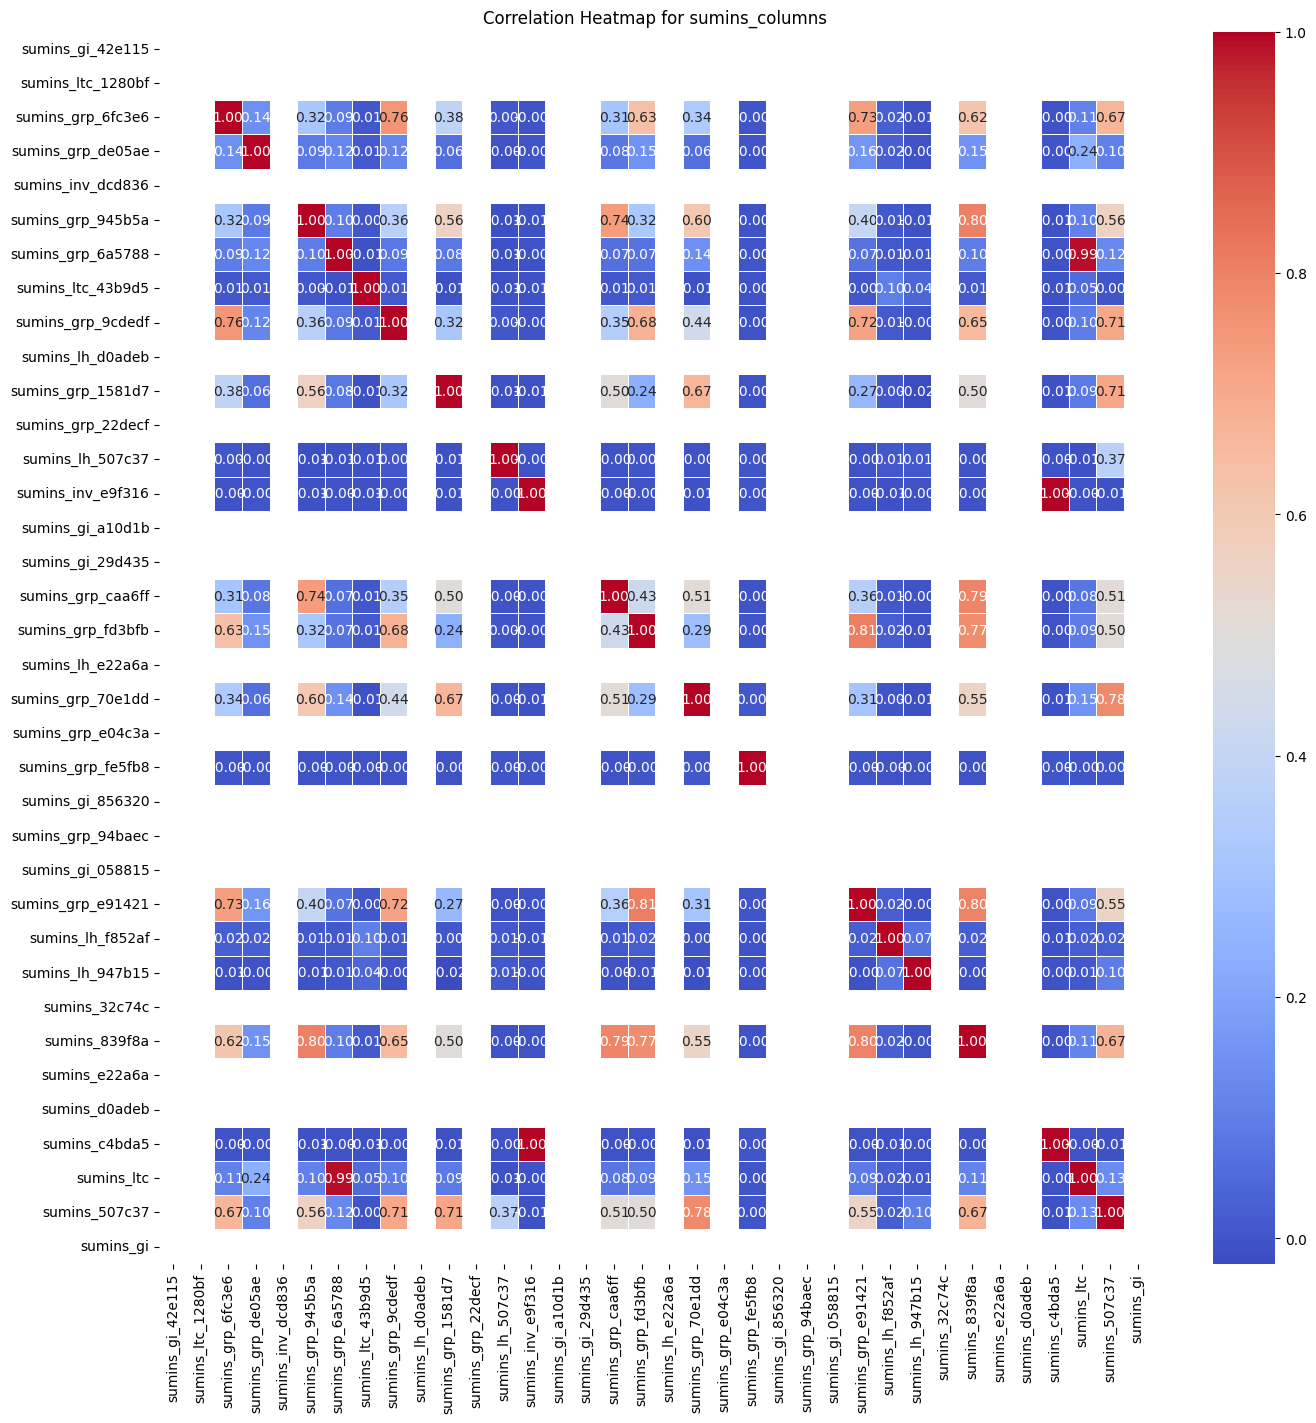

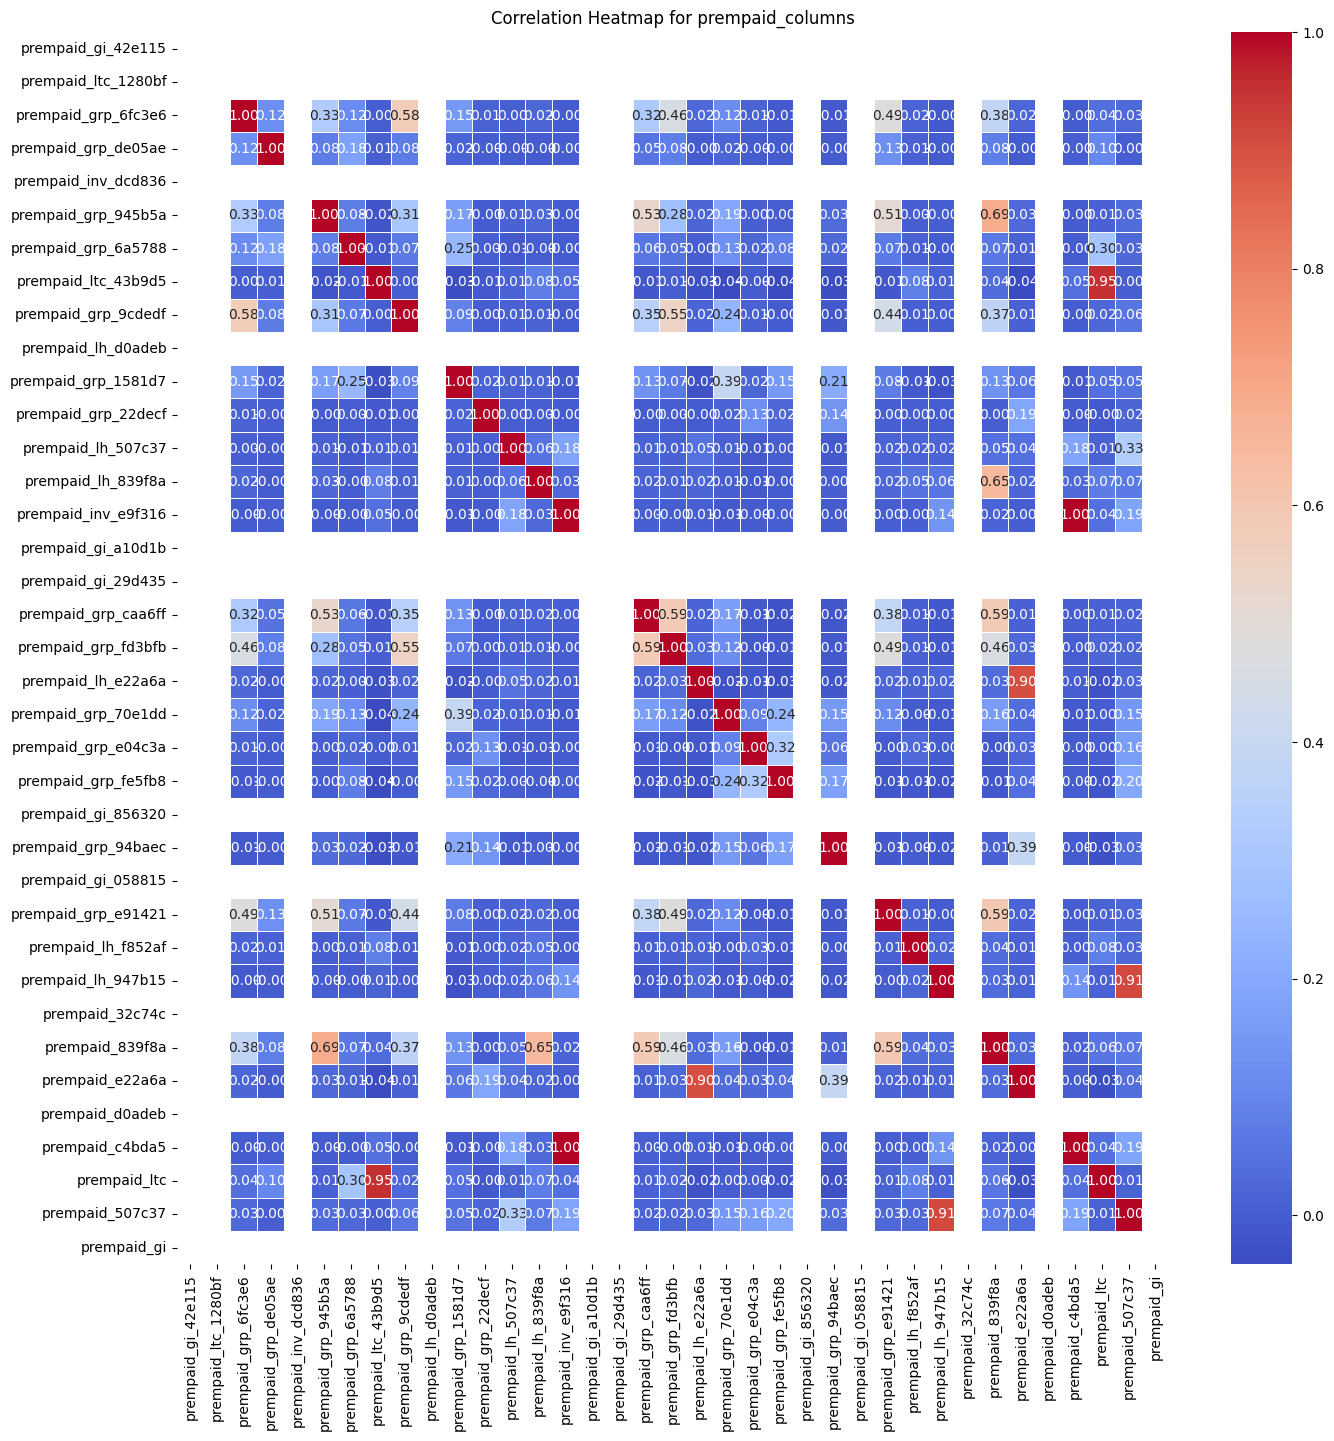

In [14]:
''' After examining the correlation among various products, we have opted not to aggregate 
    them because of the weak correlations between the sub-category products.
'''

ape_columns = df.filter(regex=r'^ape_')
sumins_columns = df.filter(regex=r'^sumins_')
prempaid_columns = df.filter(regex=r'^prempaid_')

# Plot correlation heatmap for 'ape_columns'
plt.figure(figsize=(16,16))
sns.heatmap(ape_columns.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for ape_columns')
plt.show()

# Plot correlation heatmap for 'sumins_columns'
plt.figure(figsize=(16,16))
sns.heatmap(sumins_columns.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for sumins_columns')
plt.show()

# Plot correlation heatmap for 'prempaid_columns'
plt.figure(figsize=(16,16))
sns.heatmap(prempaid_columns.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for prempaid_columns')
plt.show()

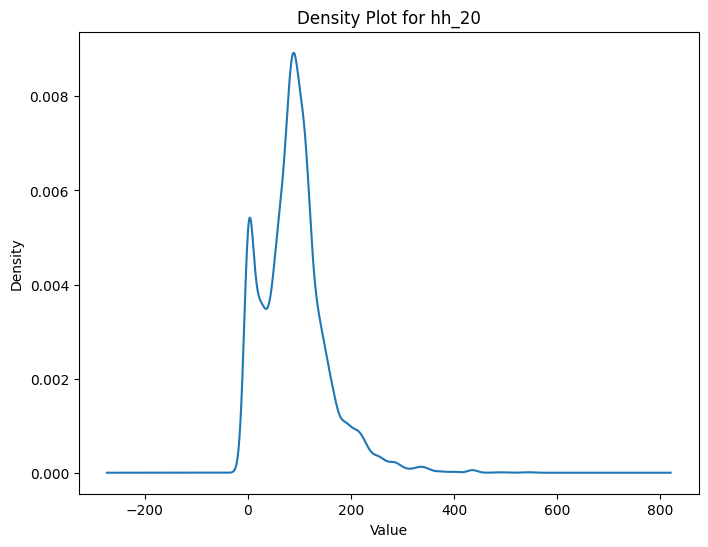

In [15]:
''' Plot density plot for 'hh_20'. It is bimodal, with a peak at 0 and another around 100.
'''
plt.figure(figsize=(8, 6))
df['hh_20'].plot(kind='density')
plt.title('Density Plot for hh_20')
plt.xlabel('Value')
plt.ylabel('Density')

plt.show()

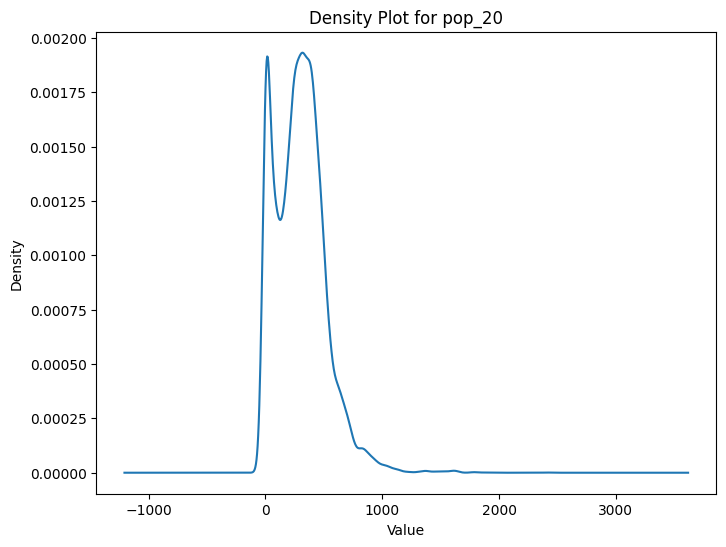

In [8]:
''' Plot density plot for 'pop_20'. It is bimodal, with a peak at 0 and another around 500.
'''
plt.figure(figsize=(8, 6))
df['pop_20'].plot(kind='density')
plt.title('Density Plot for pop_20')
plt.xlabel('Value')
plt.ylabel('Density')

plt.show()

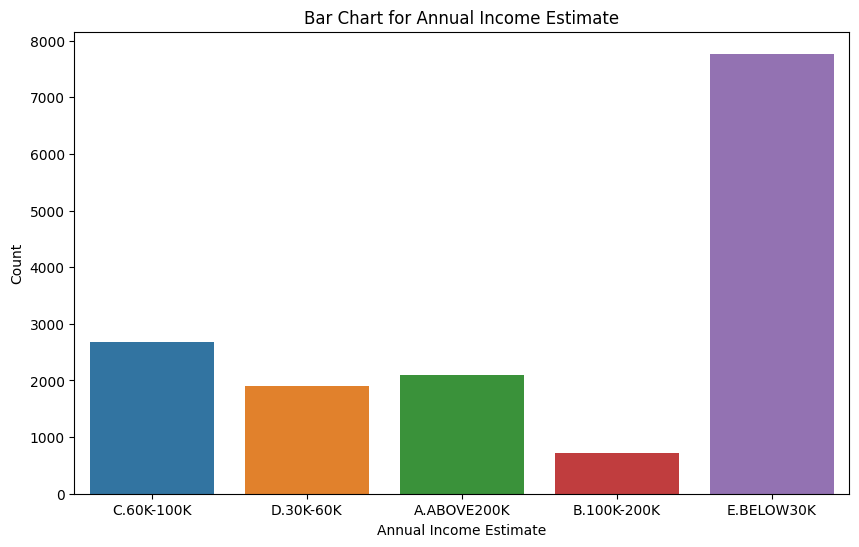

In [9]:
''' Based on the bar chart we are able to see that there is a higher portion of the dataset of 
    which the people are of annual income < 30000. This something we should keep into account 
    while training and testing our model as the model might be able to learn features of these 
    group of entries better than those which we have fewer data from. It can be seen that there 
    is a lot fewer of those from within the income category which might affect the accuracy of the 
    results of those from within that income group.
'''
plt.figure(figsize=(10, 6))
sns.countplot(x='annual_income_est', data=df)
plt.title('Bar Chart for Annual Income Estimate')
plt.xlabel('Annual Income Estimate')
plt.ylabel('Count')

plt.show()

In [10]:
def data_cleaning(df):
    '''Data Cleaning

    This snippet code preprocesses the dataset by creating dummy variables for categorical 
    columns with more than 30 unique values, dropping some irrelevant columns, and converting 
    date columns to the year.

    Dropping 'clntnum' column:
    It was dropped as 'clntnum' is irrelevant for the analysis, becuase a randomly assigned 
    number to a client should not have any influence on his/her purchasing behaviour

    Making dummies for 'race_desc', 'ctrycode_desc', 'clttype' and 'stat_flag', 'cltsex_fix' 
    and other categorical variable columns:
    Converts country codes into one that can be used while running our models, with a count 
    condition to manage dimensionality.

    Making dummies for 'hh_size_est' and 'annual_income_est' columns:
    Since this data gives a range of values it is categorical in nature and would convert it 
    for use in our models

    Converting date columns to year:
    Converting dates to years simplifies the information, making it more suitable for analysis. The specific day a product is bought, for example should not have a large influence in the prediction.
    
    Args:
        df (DataFrame): The DataFrame to be cleaned.
    Returns:
        DataFrame: The cleaned DataFrame.
    '''

    make_dummies = lambda df, column: df.join(pd.get_dummies(df[column][df[column].map(df[column].value_counts()) > 30], prefix=column))

    # Dropping 'clntnum' as in your original code
    df = df.drop('clntnum', axis=1)

    # Making dummies for 'race_desc' where count > 30
    df = make_dummies(df, 'race_desc')
    df = df.drop('race_desc', axis=1)

    # Making dummies for 'ctrycode_desc' where count > 30
    df = make_dummies(df, 'ctrycode_desc')
    df = df.drop('ctrycode_desc', axis=1)

    # Making dummies for 'clttype' where count > 30
    df = make_dummies(df, 'clttype')
    df = df.drop('clttype', axis=1)

    # Making dummies for 'stat_flag' where count > 30
    df = make_dummies(df, 'stat_flag')
    df = df.drop('stat_flag', axis=1)


    df = make_dummies(df, 'hh_size_est')
    df = df.drop('hh_size_est', axis=1)
    df = make_dummies(df, 'annual_income_est')
    df = df.drop('annual_income_est', axis=1)

    # Converting date columns to year
    df['min_occ_date'] = pd.to_datetime(df['min_occ_date'], format='%Y-%m-%d', errors='coerce').dt.year
    df['cltdob_fix'] = pd.to_datetime(df['cltdob_fix'], format='%Y-%m-%d', errors='coerce').dt.year

    # Making dummies for 'cltsex_fix' where count > 30
    df = make_dummies(df, 'cltsex_fix')
    df = df.drop('cltsex_fix', axis=1)

    columns_to_drop = [
        'giclaim_cnt_success',
        'recency_giclaim_success',
        'giclaim_cnt_unsuccess',
        'recency_giclaim_unsuccess',
        'flg_gi_claim_29d435_ever',
        'flg_gi_claim_058815_ever',
        'flg_gi_claim_42e115_ever',
        'flg_gi_claim_856320_ever',
        'recency_lapse',
        'recency_cancel'
    ]

    df.drop(columns=columns_to_drop, inplace=True)
    temp = [
        'flg_substandard',
        'flg_is_borderline_standard',
        'flg_is_revised_term',
        'flg_is_rental_flat',
        'flg_has_health_claim',
        'flg_has_life_claim',
        'flg_gi_claim',
        'flg_is_proposal',
        'flg_with_preauthorisation',
        'flg_is_returned_mail',
        'is_consent_to_mail',
        'is_consent_to_email',
        'is_consent_to_call',
        'is_consent_to_sms',
        'is_valid_dm',
        'is_valid_email',
        'is_housewife_retiree',
        'is_sg_pr',
        'is_class_1_2',
        'is_dependent_in_at_least_1_policy'
    ]

    # Drop rows with missing values in the 20 flags
    df = df.dropna(subset=temp)

    # Fill missing values in 'f_ever_declined_la' with 0
    df= df.fillna(0)

    # Check for missing values in the DataFrame after the operations
    has_missing_values = df.isna().any().any()
    if has_missing_values:
        print("[Warn] There are still missing values in the DataFrame.")
        print("Count of missing values in each column:")
        print(df.isna().sum())

    columns_to_convert = [
        'flg_substandard', 'flg_is_borderline_standard', 'flg_is_revised_term',
        'flg_is_rental_flat', 'flg_has_health_claim', 'flg_has_life_claim',
        'flg_gi_claim', 'flg_is_proposal', 'flg_with_preauthorisation',
        'flg_is_returned_mail', 'is_consent_to_mail', 'is_consent_to_email',
        'is_consent_to_call', 'is_consent_to_sms', 'is_valid_dm', 'is_valid_email',
        'is_housewife_retiree', 'is_sg_pr', 'is_class_1_2',
        'is_dependent_in_at_least_1_policy'
    ]

    # Convert boolean columns to numeric (True to 1, False to 0)
    df[columns_to_convert] = df[columns_to_convert].astype(int)

    # List of columns to convert
    columns_to_convert2 = [
        'race_desc_Chinese', 'race_desc_Indian', 'race_desc_Malay',
        'race_desc_Others', 'ctrycode_desc_Malaysia', 'ctrycode_desc_Singapore',
        'clttype_G', 'clttype_P', 'stat_flag_ACTIVE', 'stat_flag_LAPSED',
        'annual_income_est_A.ABOVE200K', 'annual_income_est_B.100K-200K',
        'annual_income_est_C.60K-100K', 'annual_income_est_D.30K-60K',
        'annual_income_est_E.BELOW30K', 'cltsex_fix_Female', 'cltsex_fix_Male'
    ]

    for column in columns_to_convert2:
        df[column] = df[column].astype(int)

    if 'f_purchase_lh' in df.columns:
        df_without_f_purchase_lh = df.drop('f_purchase_lh', axis=1)
    else:
        df_without_f_purchase_lh = df

    return df_without_f_purchase_lh, df['f_purchase_lh'] if 'f_purchase_lh' in df.columns else None


In [11]:
def split_balance_and_pca(kf, X, y):
    '''Split, balance and PCA
    A function that splits the data into training and testing sets, balances the training set, and 
    performs PCA on the training set and applies the trained PCA transformation on the test set.
    Args:
        kf: KFold object
        X: DataFrame of features
        y: DataFrame of target variable
    Returns:
        X_train_oversampled_pca: DataFrame of features for training set after oversampling and PCA
        y_train_oversampled: DataFrame of target variable for training set after oversampling
        X_test_pca: DataFrame of features for testing set after PCA
        y_test: DataFrame of target variable for testing set
        PCA: PCA object for use in transformation of the test set
        '''
    for train_index, test_index in kf.split(X):
        # Split
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]

        # Balance
        minority_indices = np.where(y_train == 1)[0]
        majority_indices = np.where(y_train != 1)[0]

        oversampled_minority_indices = np.random.choice(minority_indices, size=len(majority_indices), replace=True)
        oversampled_indices = np.concatenate([majority_indices, oversampled_minority_indices])

        X_train_oversampled = X_train.iloc[oversampled_indices]
        y_train_oversampled = y_train.iloc[oversampled_indices]

        # PCA
        n_components = 30
        pca = PCA(n_components = n_components)

        X_train_oversampled_pca = pca.fit_transform(X_train_oversampled)
        X_test_pca = pca.transform(X_test)

        X_train_oversampled_pca = pd.DataFrame(data=X_train_oversampled_pca, columns=[f'PC{i+1}' for i in range(n_components)])
        X_test_pca = pd.DataFrame(data=X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

        yield X_train_oversampled_pca, y_train_oversampled, X_test_pca, y_test, PCA

def training_with_split(hidden_data: pd.DataFrame):
    '''Training with split
    A function that performs training and testing with split, balance and PCA.
    Args:
        hidden_data: DataFrame of features and target variable
    Returns:
        None
    '''
    kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

    metrics = {
        accuracy_score: [],
        recall_score: [],
        roc_auc_score: [],
    }

    roc_curve_metrics = {
        'fpr': [],
        'tpr': [],
    }

    for X_train_kf, y_train_kf, X_test_kf, y_test_kf, PCA in tqdm(split_balance_and_pca(kf, X, y)):
        model = XGBClassifier(
        use_label_encoder=False, eval_metric='logloss',
        max_depth=3,
        learning_rate=0.05,
        n_estimators=50,
        colsample_bytree=0.1,
        subsample=0.8,
        gamma=0,
        min_child_weight=1,
        reg_alpha=0.05,
        )
        model.fit(X_train_kf.values, y_train_kf.values)

        predictions = model.predict(X_test_kf.values)
        for metric in metrics:
            metrics[metric] += [metric(y_test_kf, predictions)]

        probabilities = model.predict_proba(X_test_kf.values)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_kf, probabilities)
        roc_curve_metrics['fpr'] += [fpr]
        roc_curve_metrics['tpr'] += [tpr]

    for metric in metrics:
        print(f"Average {metric.__name__}:", np.mean(metrics[metric]))



## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [12]:
def data_preprocessing(X_train, y_train, X_test):
    ''' Data Preprocessing 
    A function that splits the data into training and testing sets, balances the training set, and 
    performs PCA on the training set and applies the trained PCA transformation on the test set.
    Args:
        X_train: DataFrame of features for training set
        y_train: DataFrame of target variable for training set
        X_test: DataFrame of features for testing set
    Returns:
        X_train_oversampled_pca: DataFrame of features for training set after oversampling and PCA
        y_train_oversampled: DataFrame of target variable for training set after oversampling
        X_test_pca: DataFrame of features for testing set after PCA
    '''
    # Balance
    minority_indices = np.where(y_train == 1)[0]
    majority_indices = np.where(y_train != 1)[0]

    oversampled_minority_indices = np.random.choice(minority_indices, size=len(majority_indices), replace=True)
    oversampled_indices = np.concatenate([majority_indices, oversampled_minority_indices])

    X_train_oversampled = X_train.iloc[oversampled_indices]
    y_train_oversampled = y_train.iloc[oversampled_indices]

    # PCA
    n_components = 30
    pca = PCA(n_components = n_components)

    X_train_oversampled_pca = pca.fit_transform(X_train_oversampled)
    X_test_pca = pca.transform(X_test)

    X_train_oversampled_pca = pd.DataFrame(data=X_train_oversampled_pca, columns=[f'PC{i+1}' for i in range(n_components)])
    X_test_pca = pd.DataFrame(data=X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

    return X_train_oversampled_pca, y_train_oversampled, X_test_pca

def data_modelling(X_train, y_train, X_test):
    ''' Data Modelling
    A function that performs data modelling using XGBoost.
    Args:
        X_train: DataFrame of features for training set
        y_train: DataFrame of target variable for training set
        X_test: DataFrame of features for testing set
    Returns:
        y_pred: DataFrame of predictions for testing set
    '''
    model = XGBClassifier(
            use_label_encoder=False, eval_metric='logloss',
            max_depth=3,
            learning_rate=0.05,
            n_estimators=50,
            colsample_bytree=0.1,
            subsample=0.8,
            gamma=0,
            min_child_weight=1,
            reg_alpha=0.05,
            )
    model.fit(X_train.values, y_train.values)
    return model.predict(X_test.values)


def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    df_train = pd.read_parquet("./data/catB_train.parquet") # link to training data
    X_train, y_train = data_cleaning(df_train)
    X_test, _ = data_cleaning(hidden_data)
    X_train, y_train, X_test = data_preprocessing(X_train, y_train, X_test)
    y_pred = data_modelling(X_train, y_train, X_test)

    return list(y_pred)

    

##### Cell to check testing_hidden_data function

In [13]:
# This cell should output a list of predictions.
test_df = pd.read_parquet(filepath)
test_df = test_df.drop(columns=["f_purchase_lh"])
print(testing_hidden_data(test_df))

[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!